In [4]:
!nvidia-smi

Tue May 28 17:28:42 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1050        On  |   00000000:01:00.0 Off |                  N/A |
| N/A   36C    P8             N/A / ERR!  |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
import os
HOME = os.getcwd()
print(HOME)

/home/amir/projectaw2


In [6]:
# Pip install method (recommended)

!pip install ultralytics==8.0.230

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.230 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1050, 4034MiB)
Setup complete ✅ (8 CPUs, 7.5 GB RAM, 385.6/913.5 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [23]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="zZozGIc2Jnv4iJZTkO4S")
project = rf.workspace("ai-its-indo-pkjto").project("ai-its")
version = project.version(20)
dataset = version.download("yolov8")

/home/amir/projectaw2/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.230, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to AI-ITS-20 in yolov8:: 100%|██████████████████| 11590/11590 [00:00<00:00, 11656.69it/s]


## Custom Training

In [26]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=320 plots=True

/home/amir/projectaw2
New https://pypi.org/project/ultralytics/8.2.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.230 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1050, 4034MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/amir/projectaw2/datasets/AI-ITS-20/data.yaml, epochs=25, time=None, patience=50, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mas

In [27]:
!ls {HOME}/runs/detect/train3/

args.yaml			 R_curve.png	      train_batch5327.jpg
confusion_matrix_normalized.png  results.csv	      val_batch0_labels.jpg
confusion_matrix.png		 results.png	      val_batch0_pred.jpg
F1_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
labels_correlogram.jpg		 train_batch1.jpg     val_batch1_pred.jpg
labels.jpg			 train_batch2.jpg     weights
P_curve.png			 train_batch5325.jpg
PR_curve.png			 train_batch5326.jpg


/home/amir/projectaw2


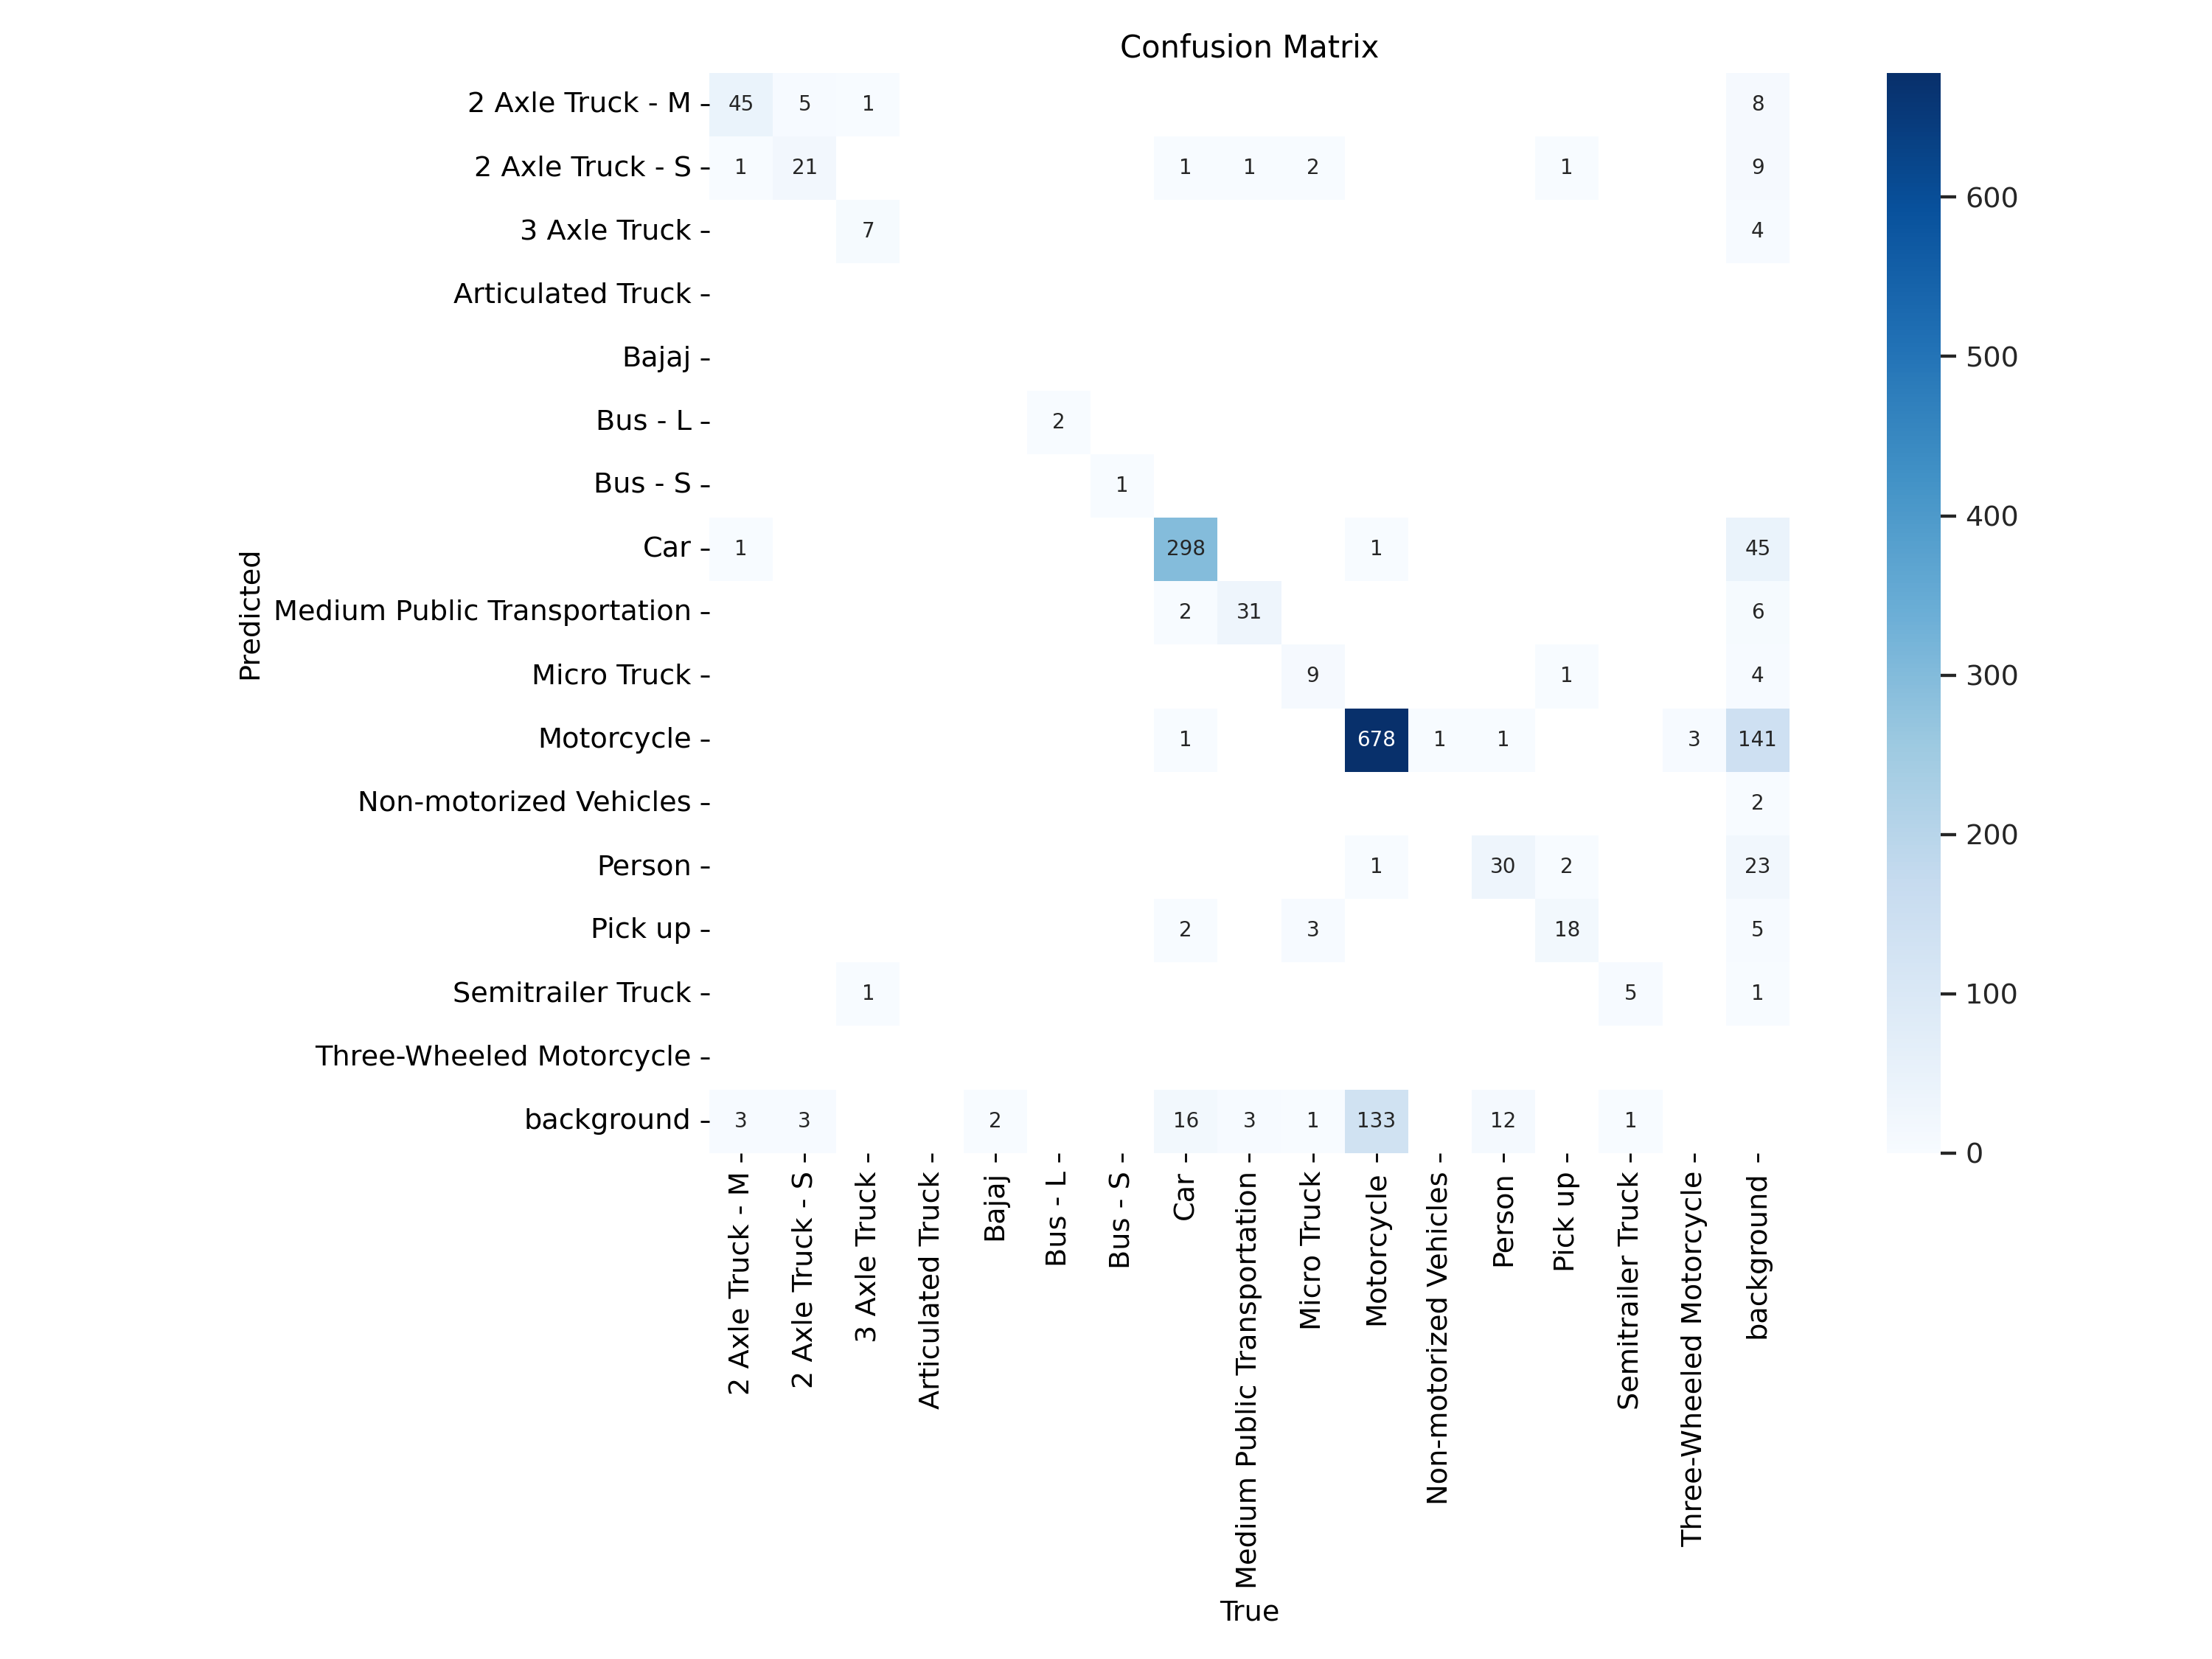

In [28]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

/home/amir/projectaw2


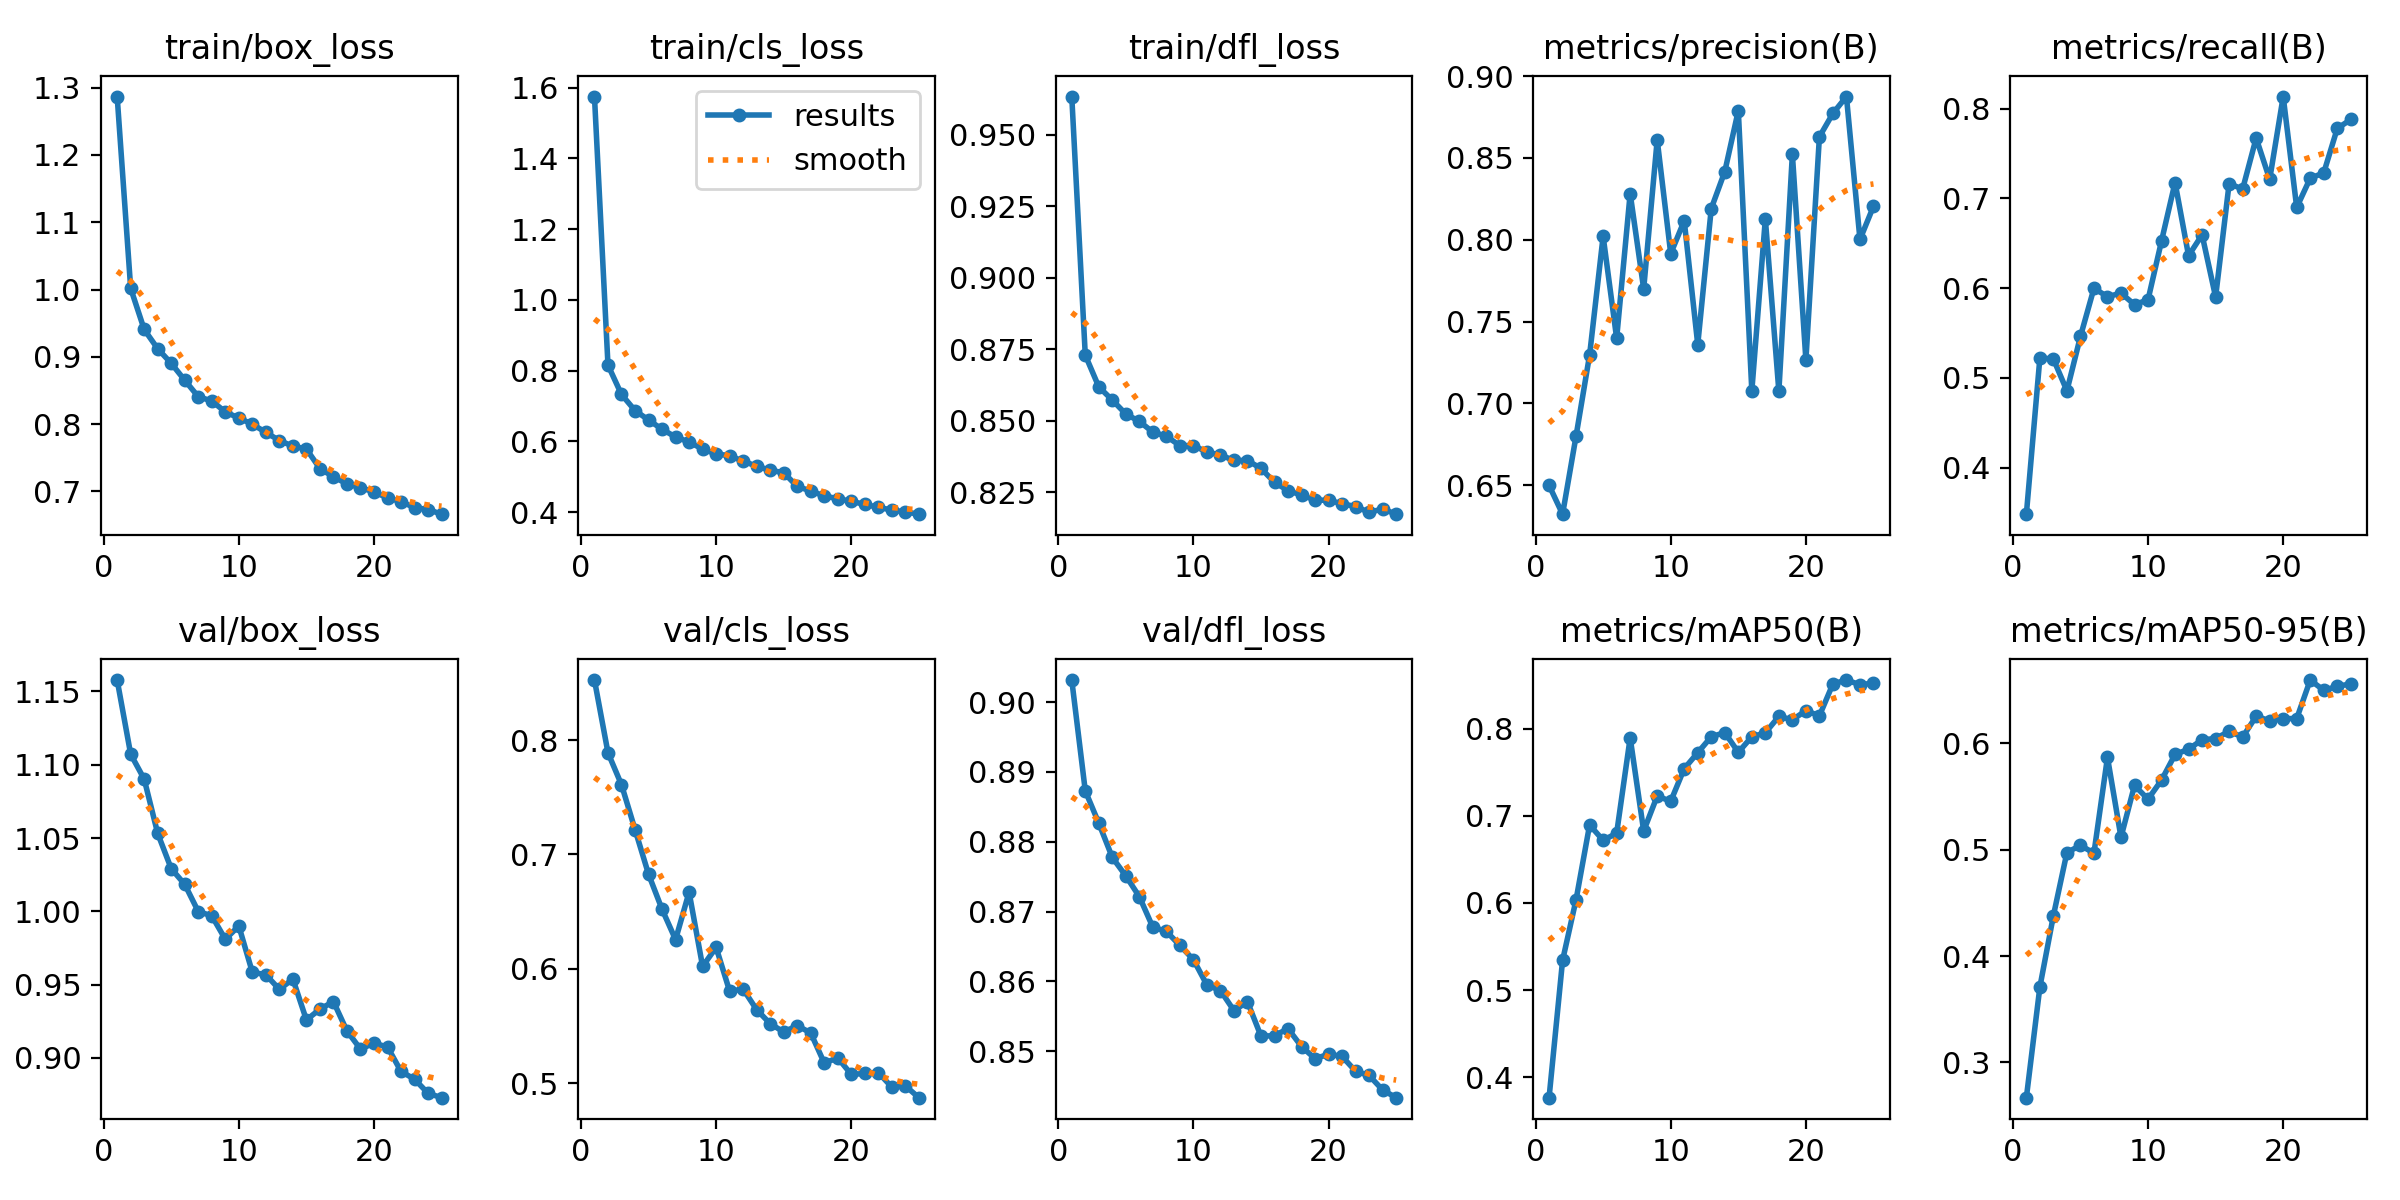

In [29]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

/home/amir/projectaw2


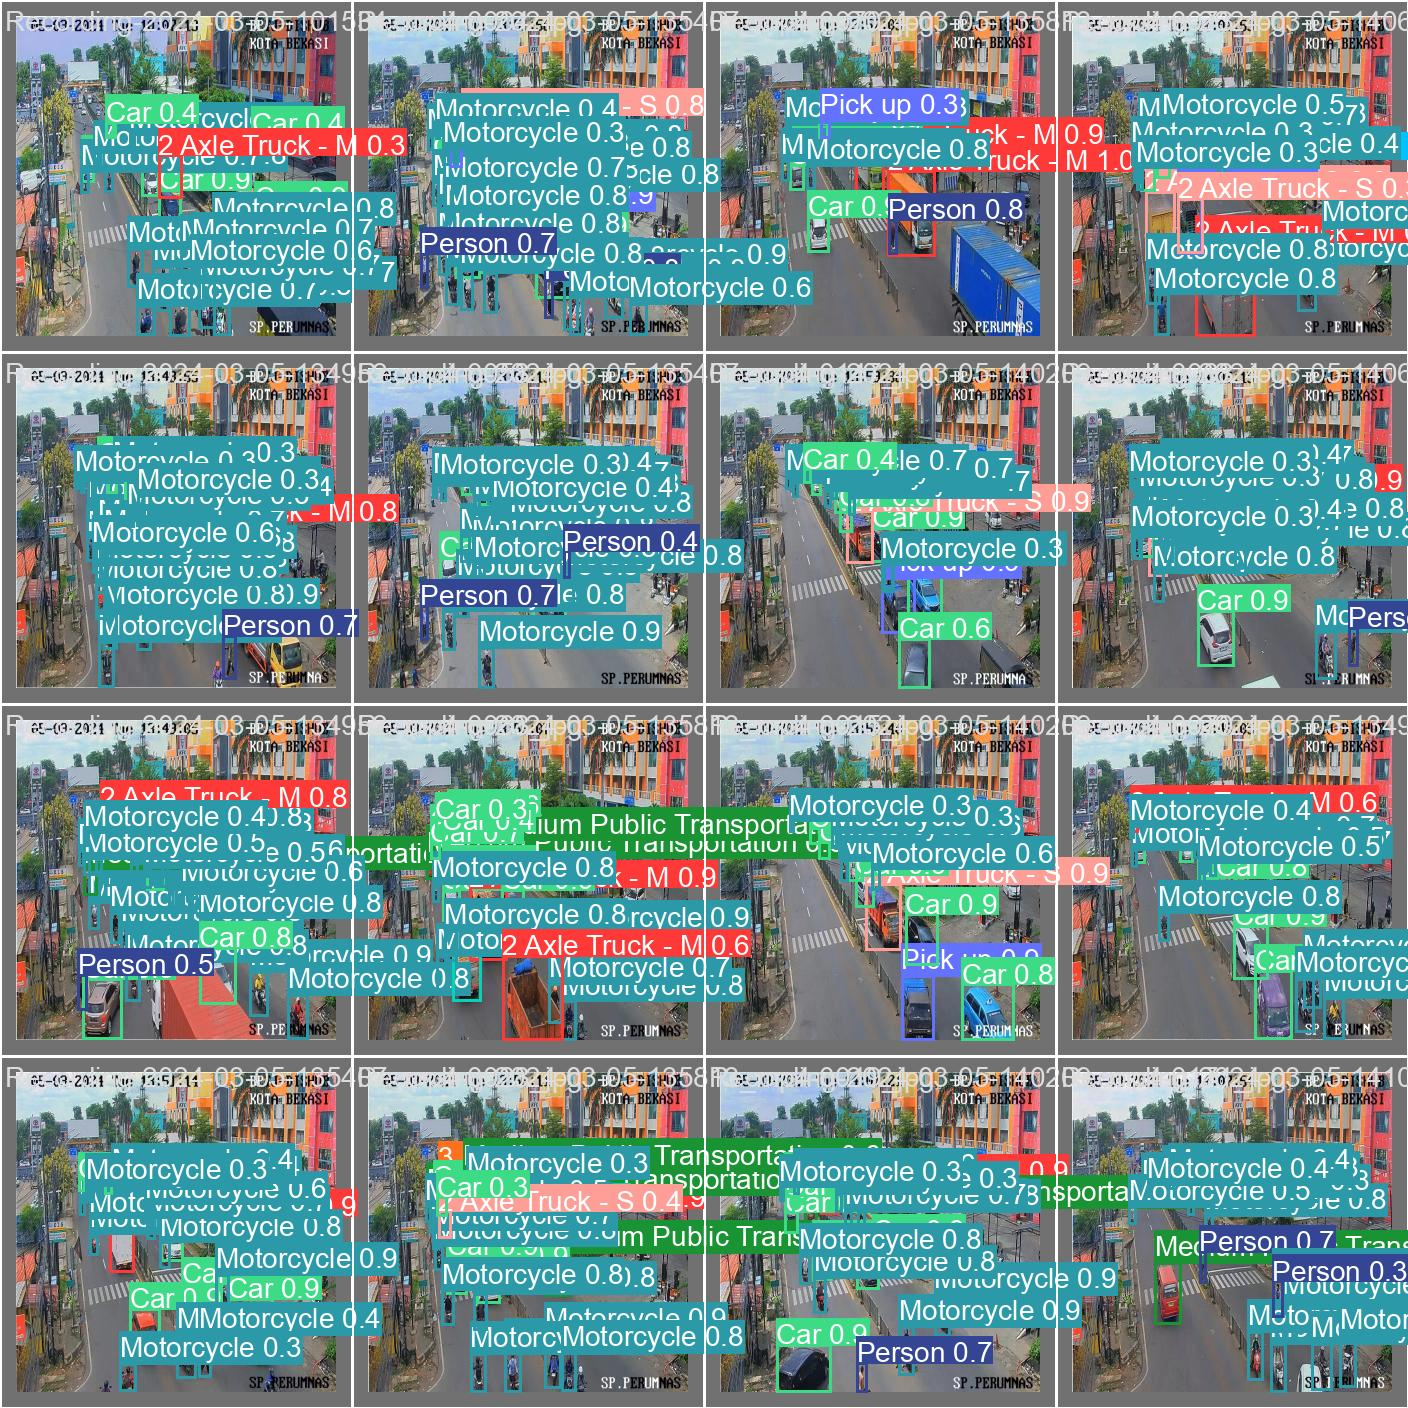

In [30]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [31]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

/home/amir/projectaw2
Ultralytics YOLOv8.0.230 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1050, 4034MiB)
/home/amir/.miniforge3/envs/colab/lib/python3.12/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
Model summary (fused): 168 layers, 11131776 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /home/amir/projectaw2/datasets/AI-ITS-20/valid/labels.cache... 64 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         64       1351      0.879      0.723      0.851      0.657
      2 Axle Truck - M         64         50       0.89      0.809      0.925      0.749
      2 Axle Truck - S         64         29      0.921      0.862      0.91

## Inference with Custom Model

In [32]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.04 source={dataset.location}/test/images save=True

/home/amir/projectaw2
Ultralytics YOLOv8.0.230 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1050, 4034MiB)
/home/amir/.miniforge3/envs/colab/lib/python3.12/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
Model summary (fused): 168 layers, 11131776 parameters, 0 gradients, 28.5 GFLOPs

image 1/49 /home/amir/projectaw2/datasets/AI-ITS-20/test/images/Recording-2024-03-05-101534_mp4-0013_jpg.rf.28d588f735af697871a6432562f832f3.jpg: 320x320 2 2 Axle Truck - Ms, 9 Cars, 1 Medium Public Transportation, 15 Motorcycles, 1 Person, 12.5ms
image 2/49 /home/amir/projectaw2/datasets/AI-ITS-20/test/images/Recording-2024-03-05-113107_mp4-0007_jpg.rf.45accbd52c2622b1c17174be22892c6b.jpg: 320x320 1 2 Axle Truc

**NOTE:** Let's take a look at few results.

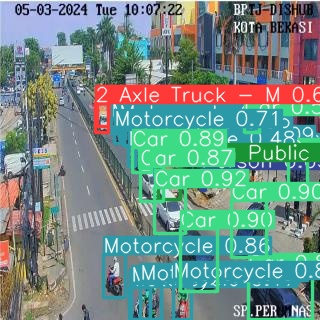

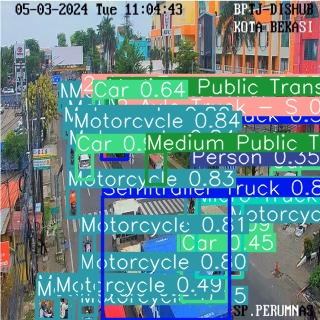

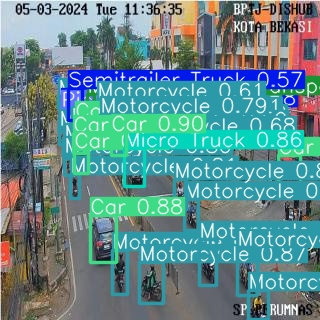

In [33]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.04 source={HOME}/V_20231016_161401_ES10.mp4 save=True

/home/amir/projectaw2
Ultralytics YOLOv8.0.230 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1050, 4034MiB)
/home/amir/.miniforge3/envs/colab/lib/python3.12/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
Model summary (fused): 168 layers, 11131776 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (1/4519) /home/amir/projectaw2/V_20231016_161401_ES10.mp4: 192x320 8 Cars, 1 Motorcycle, 70.8ms
video 1/1 (2/4519) /home/amir/projectaw2/V_20231016_161401_ES10.mp4: 192x320 7 Cars, 1 Motorcycle, 10.4ms
video 1/1 (3/4519) /home/amir/projectaw2/V_20231016_161401_ES10.mp4: 192x320 5 Cars, 4 Motorcycles, 1 Pick up, 10.4ms
video 1/1 (4/4519) /home/amir/projectaw2/V_20231016_161401_ES10.mp4: 192x320 8 Cars, 

In [ ]:
!ffmpeg -i {HOME}/runs/detect/predict2/V_20231016_161401_ES10.avi -vcodec libx264 {HOME}/runs/final.mp4